# Выявление закономерностей, определяющих успех компьютерных игр.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных

Импорт библиотек, датасета и общая информация:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
pd.options.display.max_columns = None
import numpy as np
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выводы:**

Каких-либо аномально маленьких или больших значений в таблице не обнаружено.
Присутствуют пропуски по столбцам "Название игры", "Год выхода", "Жанр", оценки критиков и пользователей, а также "Рейтинг".
Требуется замена типов данных в столбце "Год выхода", "Оценка пользователя".

## Предобработка данных

### Подготовка данных

Изменю регистр в названиях столбцов:

In [5]:
#изменение регистра в названиях столбца
data.columns = data.columns.str.lower()

### Изменение типов данных

Изменю типы данных по столбцам "year_of_release" и 'user_score'.

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Аббревиатура'tbd' - to be determined, подлежит уточнению, эти значения заменин на NaN

In [7]:
data['user_score'] = data['user_score'].replace("tbd", np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [8]:
# для проверки вывожу общую информацию о датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Пропуски по названию игры заполнить нельзя, удаляю их

In [9]:
data.dropna(subset = ['name'], inplace = True)
data.dropna(subset = ['year_of_release'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Пропуск в названии игры и жанре был симметричен, оба пропуска удалены.

Пропуски нельзя заполнить в следующих столбцах:


1. critic_score
2. user_score        
3. rating

Заполнение данных какими-либо значениями может привести к искажению результатов исследования, оставляю строки в том же виде.

### Проверка дубликатов:

In [10]:
data.duplicated().sum()

0

Дублирующихся строк нет. 

### Расчёт дополнительных данных

Добавляю столбец с суммарными продажами во всех регионах:

In [11]:
data['sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
sales              16444 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Сколько игр выпускалось в разные года?

Построю графики по количеству игр выходящих в год и суммарные продажи.

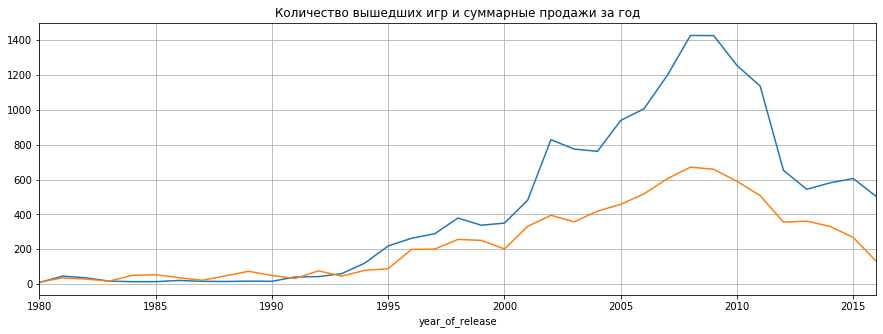

In [13]:
#игр в год
games_in_years = data.groupby('year_of_release')['name'].count()
games_in_years.plot(grid=True, figsize=(15, 15), xlim=(1980,2016), title = 'Количество вышедших игр и суммарные продажи за год')
games_in_years_sales = data.groupby(['year_of_release'])['sales'].sum()
#суммарные продажи в год
games_in_years_sales.plot(grid=True, figsize=(15, 5), xlim=(1980,2016))

Из графиков можно сделать вывод, что продажи напрямую зависят от количества выходящих игр.

Вместе с тем, есть года, например, 1991, 1995, 2015, когда количество вышедших игр выросло, а продажи были ниже, чем в остальные периоды. 


### Как меняются продажи по платформам?  Характерные сроки появления новых и исчезновения старых платформ. Выбор периода для исследования.

Сгруппирую данные по платформам и построю график:

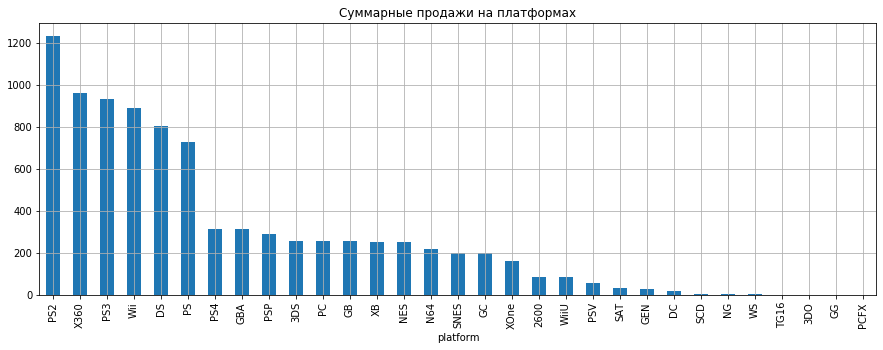

In [14]:
sales_platform = data.groupby('platform')['sales'].sum().sort_values(ascending = False)
sales_platform.plot(kind = 'bar', grid=True, figsize=(15, 5), title = 'Суммарные продажи на платформах')

Самые популярные игровые платформы за весь период это PS2, X360, WII, PS3, DS, PS.

Посмотрим продажи по этим платформам за время их существования:

Text(0, 0.5, 'Уровень продаж')

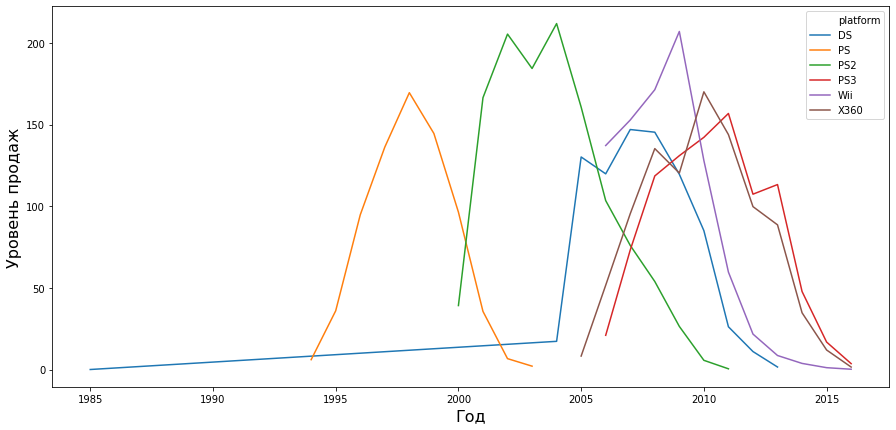

In [15]:
top_platforms = ['PS2','X360','Wii','PS3','DS','PS']
sales_platforms_years = data.query('platform in @top_platforms')
top_platforms_sales = sales_platforms_years.pivot_table(index=['platform','year_of_release'], values = 'sales', aggfunc = 'sum').reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'year_of_release', y ='sales', hue='platform', data=top_platforms_sales)
plt.xlabel('Год',fontsize=16)
plt.ylabel('Уровень продаж',fontsize=16)

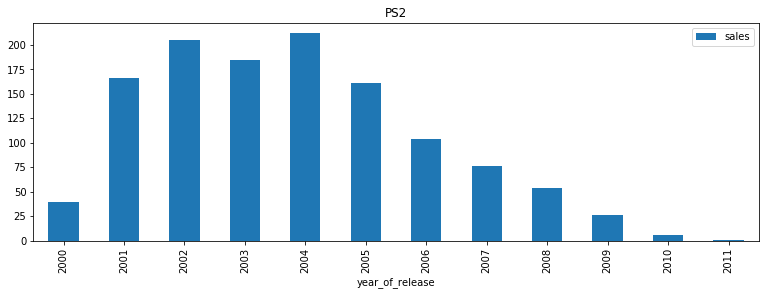

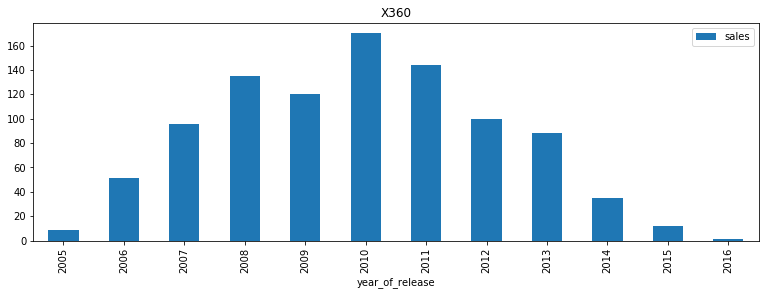

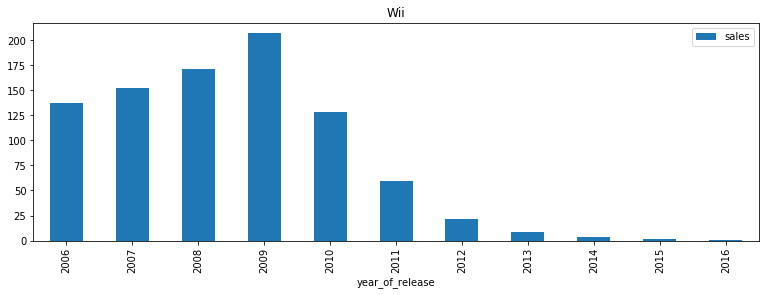

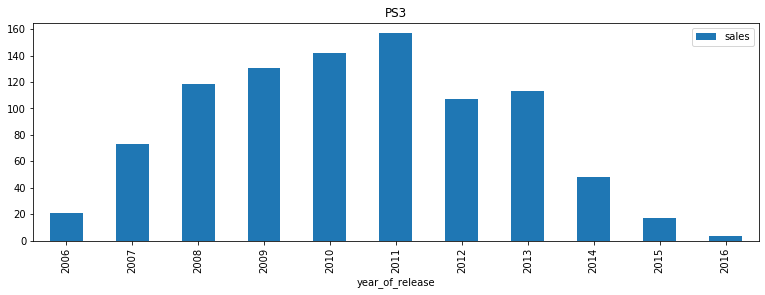

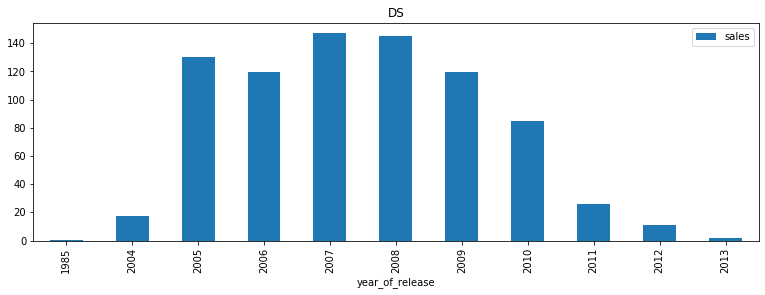

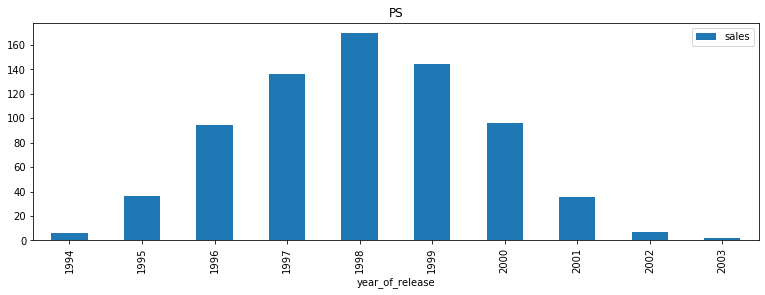

In [16]:
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Срок "жизни" платформы составляет примерно 10 лет, но продажи на платформах растут, как правило, около 6 лет, затем происходит спад.

Буду использовтаь данные для прогноза за последние 6 лет, с 2010 года.

In [17]:
data= data[data['year_of_release'] >= 2010]

###  Какие платформы растут или падают? Потенциально прибыльные платформы. "Ящик с усами" для глобальных продаж.

Сгруппирую данные в сводную таблицу для построения графика:

In [18]:
years_sales = data.pivot_table(index=['platform','year_of_release'], values = 'sales', aggfunc = 'sum').reset_index()

Text(0, 0.5, 'Уровень продаж')

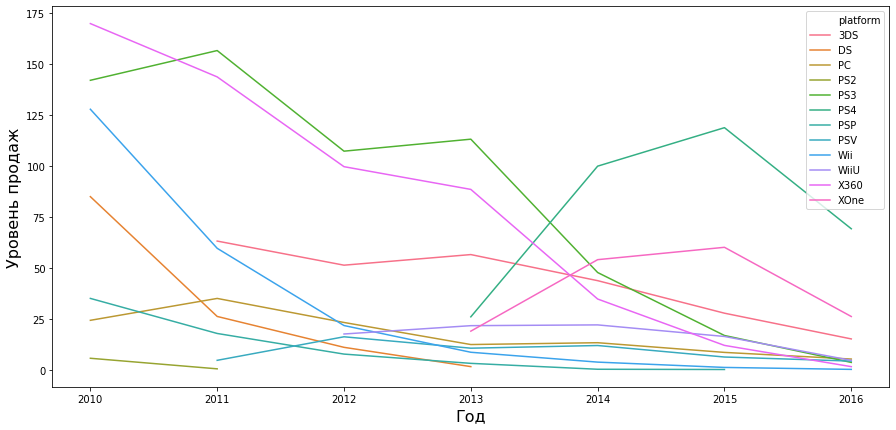

In [19]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'year_of_release', y ='sales', hue='platform', data=years_sales)
plt.xlabel('Год',fontsize=16)
plt.ylabel('Уровень продаж',fontsize=16)

Из графика можно сделать вывод, что продажи на всех платформах падают.

Но лидерами остаются такие платформы, как PS4, XOne, 3DS.

Остальные платформы остаются примерно на одном уровне.

Построю ящик с усами:

Text(0, 0.5, 'Глобальные продажи')

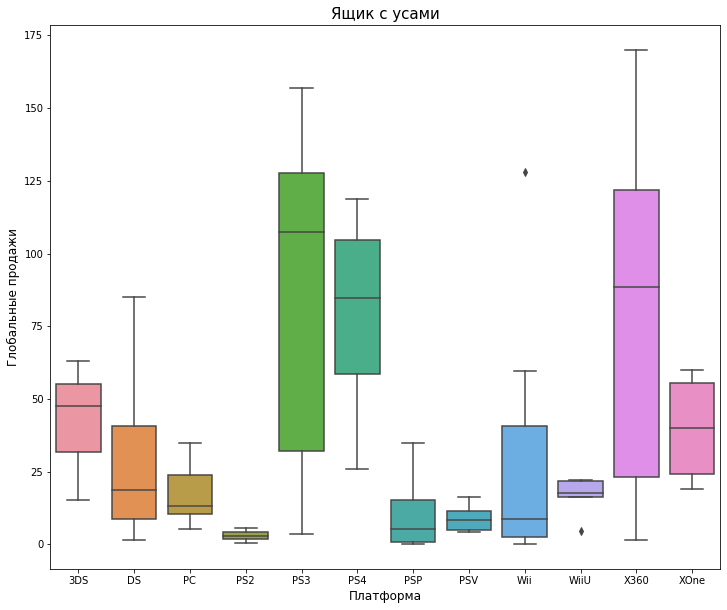

In [20]:
plt.figure(figsize=(12,10))
sns.boxplot(data=years_sales, x='platform', y='sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)


Наибольние медианные продажи у DS, PS3 и X360.

Почти у всех платформ есть выбросы - игры, продажи, которых были аномальны большими.

(0, 3)

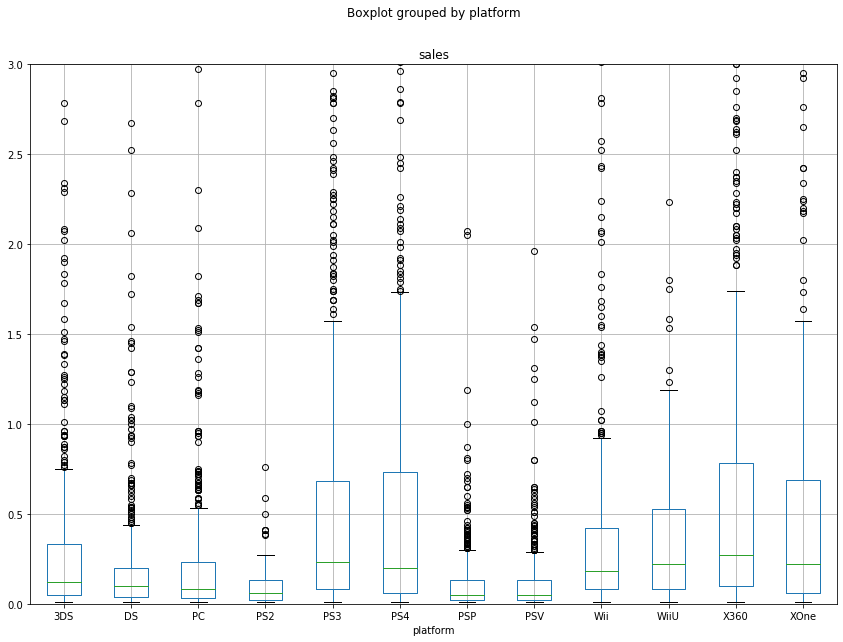

In [21]:
import warnings
warnings.filterwarnings('ignore')

data.boxplot(column = 'sales', by='platform', figsize=(14,10))

plt.ylim(0,3)

### Влияние на продажи внутри платформы отзывов покупателей и критиков.

Для проверки возьмем данные по платформе X360

In [22]:
sales_x360 = data.query('platform == "X360"')

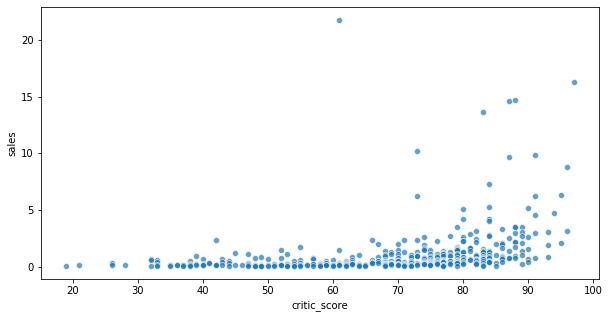

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))                         
sns.scatterplot(data=sales_x360, x='critic_score', y='sales', alpha=0.7)               

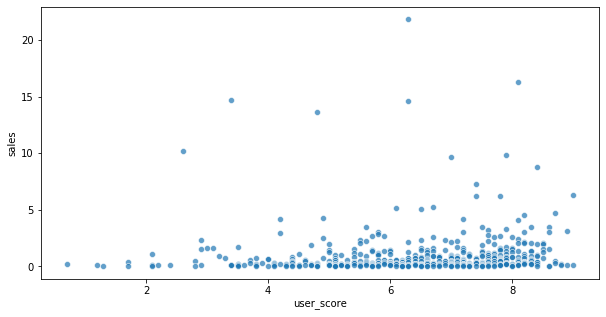

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))     
sns.scatterplot(data=sales_x360, x='user_score', y='sales', alpha=0.7) 

In [25]:
print("Матрица корреляций")
sales_x360[sales_x360.platform == "X360"][['sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,sales,critic_score,user_score
sales,1.000000,0.340064,0.066035
critic_score,0.340064,1.000000,0.597552
user_score,0.066035,0.597552,1.000000


Оценка критиков оказывает влияние на продажи, корреляция sales и critic_score равна 0,34.
Игры с высокой оценкой критиков продаются лучше, но от оценки пользователей продажи игры не зависят.

Проверим корреляцию для платформ PS2, X360, WII, PS3, DS, PS.

In [26]:
for platform in top_platforms:
    print('\n{0}:'.format(platform))
    platform = data[data['platform']== platform]
    print('Корреляция между отзывами критиков и продажами:', platform['critic_score'].corr(platform['sales']))
    print('Корреляция между отзывами пользователей и продажами:', platform['user_score'].corr(platform['sales']))


PS2:
Корреляция между отзывами критиков и продажами: nan
Корреляция между отзывами пользователей и продажами: 0.07472375514301433

X360:
Корреляция между отзывами критиков и продажами: 0.3400641581317536
Корреляция между отзывами пользователей и продажами: 0.06603518173931955

Wii:
Корреляция между отзывами критиков и продажами: 0.3105877104820997
Корреляция между отзывами пользователей и продажами: 0.14715977707531702

PS3:
Корреляция между отзывами критиков и продажами: 0.40059409352022496
Корреляция между отзывами пользователей и продажами: 0.06509241630476506

DS:
Корреляция между отзывами критиков и продажами: 0.2801624634637196
Корреляция между отзывами пользователей и продажами: 0.25142811742297444

PS:
Корреляция между отзывами критиков и продажами: nan
Корреляция между отзывами пользователей и продажами: nan


Для PS данные отсутствуют, так как мы используем для расчёта данные с 2010 года, в 2010 году игры на PS уже не продавались.

Выводы для остальных платформ аналогичны. 

Следовательно, для всех платформ характерно среднее влияние отзывов критиков на продажи и отсутствие влияния отзывов пользователей.

### Распределение игр по жанрам. Самые прибыльные жанры. 

Посмотрим общее распределение игр по жанрам:

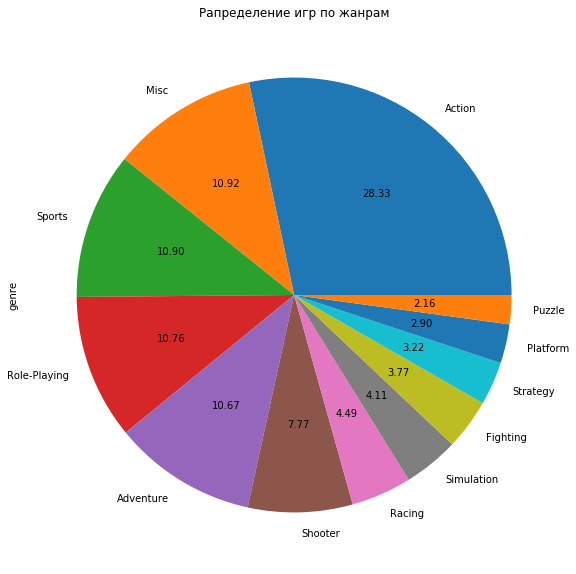

In [27]:
genre = data.groupby('genre')['genre'].count().sort_values(ascending = False)
genre.plot(kind = 'pie', figsize=(15, 10), title = 'Рапределение игр по жанрам', autopct="%.2f")

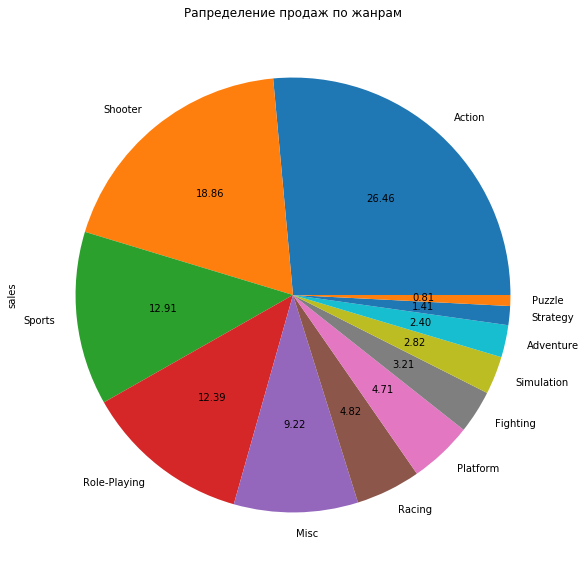

In [29]:
genre = data.groupby('genre')['sales'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize=(15, 10), title = 'Рапределение продаж по жанрам', autopct="%.2f")

Больше всего покупают игры жанра Action, возможно, это связано с тем, что игр данного жанра выпускается больше всех остальных.

Затем, игры жанра Sports.
Shooter на третьем месте по продажам, хотя игр производится почти в два раза меньше.

Text(0, 0.5, 'Подпись')

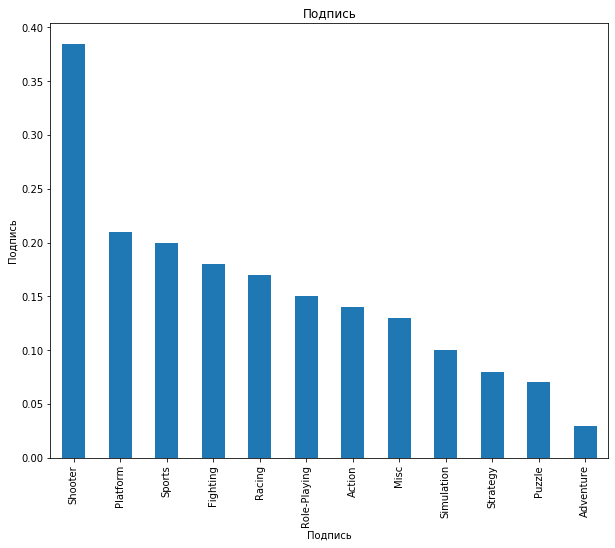

In [30]:
# КОД РЕВЬЮЕРА

data.groupby('genre')['sales'].median().sort_values(ascending = False).plot(kind='bar', figsize=(10,8))
plt.title('Подпись')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

## Портрет пользователя каждого региона

### Посмотрим на самые популярные платформы в регионах:

In [31]:
na_platform = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
eu_platform = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
jp_platform = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)

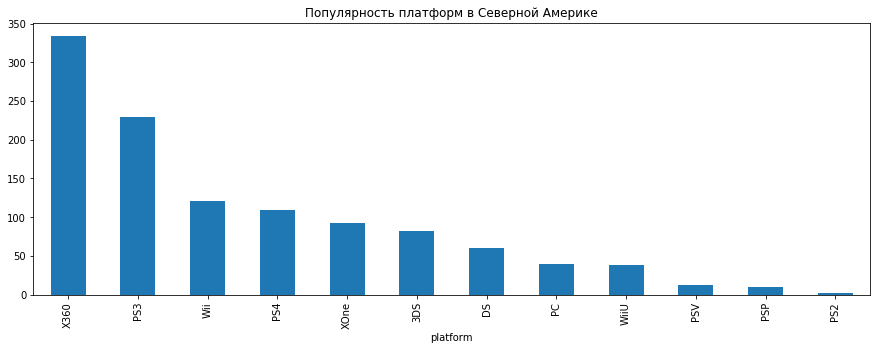

In [32]:
na_platform.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность платформ в Северной Америке')

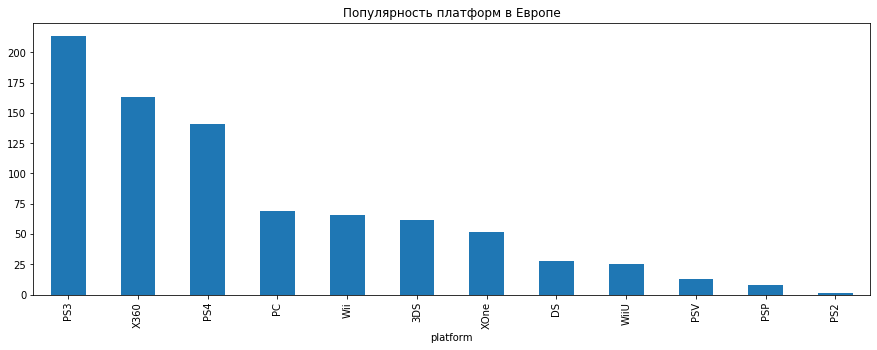

In [33]:
eu_platform.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность платформ в Европе')

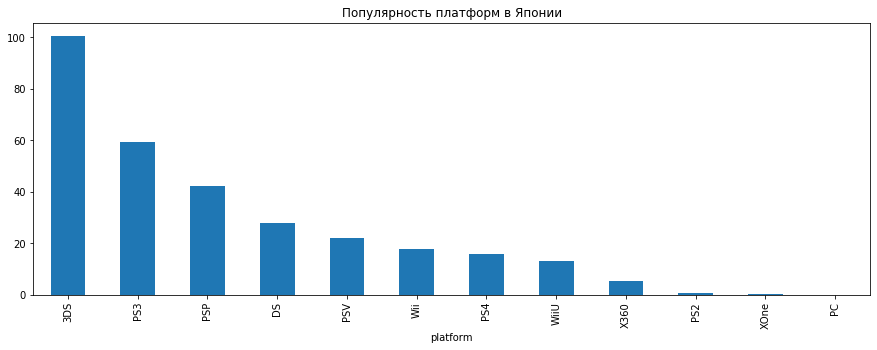

In [34]:
jp_platform.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность платформ в Японии')

Среди пользователей Северной Америки самая популярная платформа Х360.

Для европейцев PS3, а у японцев 3DS.

### Самые популярные жанры в регионах:

In [35]:
na_genre = data.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
eu_genre = data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
jp_genre = data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

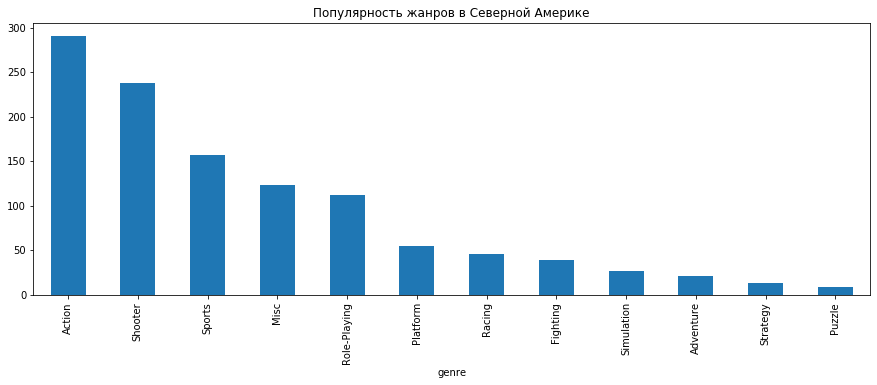

In [36]:
na_genre.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность жанров в Северной Америке')

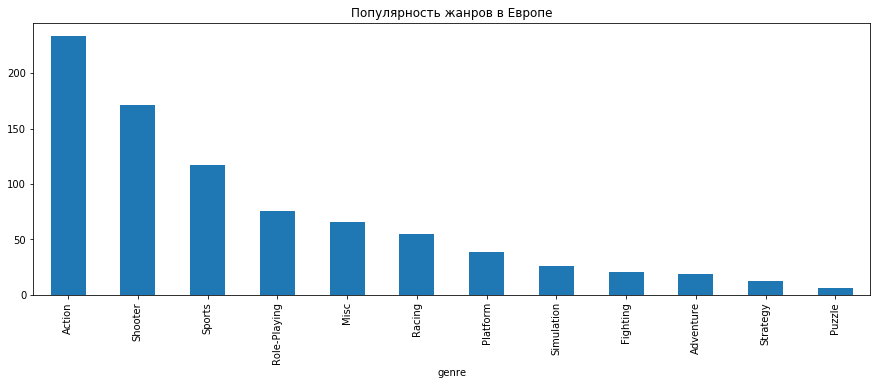

In [37]:
eu_genre.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность жанров в Европе')

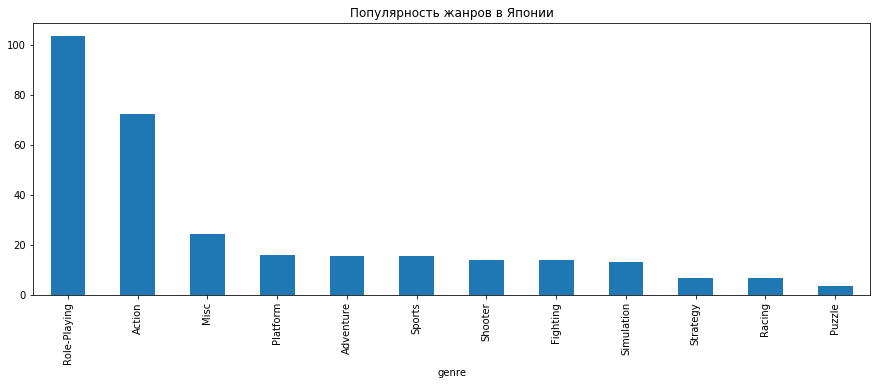

In [38]:
jp_genre.plot(kind = 'bar', figsize=(15, 5), title = 'Популярность жанров в Японии')

Среди пользователей Северной Америки и Европы самый популярный жанр Action.
Японцы любят игры жанра Role-Playing.

### Влияние рейтинга на продажи в регионах:

Рейтинги в системе ESRB
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»  
- «M» («Mature») — «Для взрослых»  
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [39]:
data['rating'] = data['rating'].fillna('No rating')

In [40]:
na_esrb = data.pivot_table(index=['rating'], values = 'na_sales', aggfunc = 'sum')
eu_esrb = data.pivot_table(index=['rating'], values = 'eu_sales', aggfunc = 'sum')
jp_esrb = data.pivot_table(index=['rating'], values = 'jp_sales', aggfunc = 'sum')

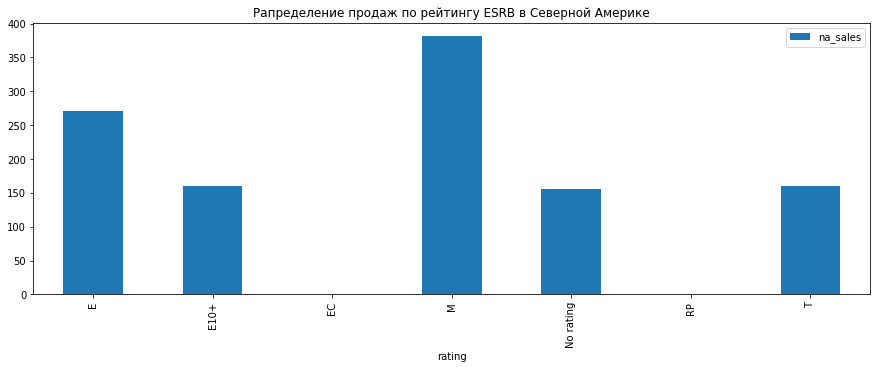

In [41]:
na_esrb.plot(kind = 'bar', figsize=(15, 5), title = 'Рапределение продаж по рейтингу ESRB в Северной Америке')

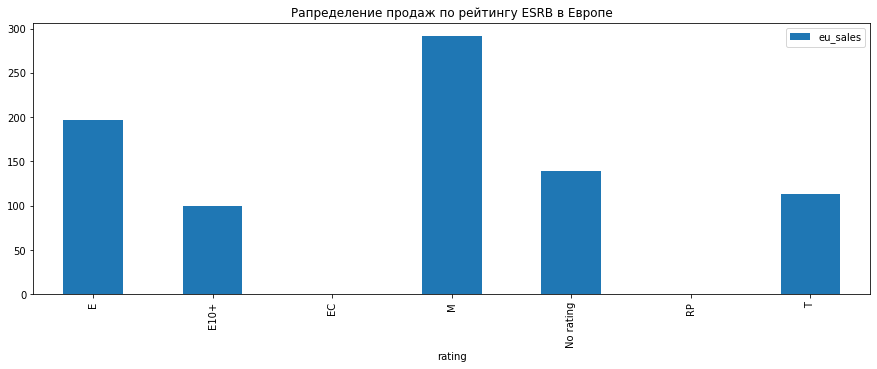

In [42]:
eu_esrb.plot(kind = 'bar', figsize=(15, 5), title = 'Рапределение продаж по рейтингу ESRB в Европе')

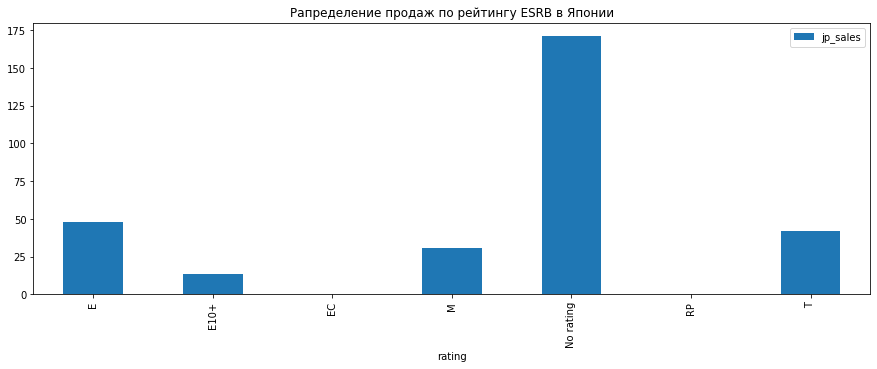

In [43]:
jp_esrb.plot(kind = 'bar', figsize=(15, 5), title = 'Рапределение продаж по рейтингу ESRB в Японии')

**Среди игр с присвоенным рейтингом: **

Во всех регионах наиболее популярны игры с рейтингом Е - для всех.

**Игры без рейтинга:**

В Японии такие игры являются самыми популярными, в Америке и Европе продажи у игр без рейтинга на среднем уровне. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для оценки гипотезы будем применять тест Стюдента.

H0 — cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 — cредние пользовательские рейтинги платформ Xbox One и PC различаются.

α = 5%

In [44]:
XOne = data.query('platform == "XOne"')['user_score'].dropna()
PC = data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(XOne, PC)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Средняя оценка пользователей платформы XBox One отличается от средней оценки пользователей платформы PC. 

Гипотеза не подтвердилась.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Для оценки гипотезы будем применять тест Стюдента.

H0 — cредние пользовательские рейтинги жанров Action и Sports одинаковые

H1 — cредние пользовательские рейтинги жанров Action и Sports разные.

α = 5%

In [45]:
Action = data.query('genre == "Action"')['user_score'].dropna()
Sports  = data.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(Action, Sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  7.839124224330309e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась, рейтинги для жанров Action и Sports различаются.

## Выводы:

**Шаг 1.** Знакомство с данными
Ознакомились с данными, посмотрели общую информацию, выявили пропуски, изменили типы данных.

**Шаг 2.** Подготовка данных
Удалили некоторые пропуски, обнаружили необычное значени tbd - "to be determined" и заменили это значение на NaN.
Многие пропуски, например, в столбцах оценок оставили незаполненными, чтобы не исказить статистику.

Посчитали общее количество продаж по всем регионам, добавили их в столбец sales.

**Шаг 3.** Исследовательский анализ данных

Было обнаружено, что резкий рост выпуска игр приходится на 2000 год, а пик на 2008-2009 гг.
Характерный срок жизни платформы - 10 лет, но продажи на платформах, как правило, растут только в течение 6 лет, поэтому оставили данные с 2010 по 2016 гг.

3 потенциально прибыльных платформ - PS4, XOne, 3DS.
Наибольшие медианные продажи у платформ DS, PS3 и X360.

Почти у всех платформ есть определенные игры, которые "выстрелили".
Компьютерные игры PC стоят дешевле консольных.

Оценки критиков очень слабо влияют на общие продажи, оценки пользователей не влияют совсем.

Больше всего игр жанра Action, затем идут Sports и misc.

Чаще всего покупают игры жанра Action, затем Sports, Shooter на третьем месте по продажам.

**Шаг 4.** Портрет пользователя региона
В Северной Америке самые популярные платформы X360, PS3 и Wii. Европейцы предпочитают PS3, X360 и PS$. В Японии популярны 3DS, PS3, PSP.

В NA и EU самые популярные жанры совпадают - Actions, Shooter и Sports. В JP вкусы сильно отличаются, там самые популярные жанры Role-playing  и Actions, остальные жанры гораздо менее полпулярны.

В Америке и Европе лидируют игры с рейтингом Е - "Для всех", в Японии такие игры на втором месте, а популярнее остальных игры без рейтинга, а также игры с рейтингом T - "Для подростков".
В Северной Америке и Европе на втором месте игры с рейтингом М - "Для взрослых". 

**Шаг 5.** Проверка гипотез
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась.